In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [3]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [4]:
df['Date'] = pd.to_datetime(df['date'])

In [5]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [6]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [9]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [10]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [11]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [12]:
IC1= df[(df['city'] == 'Mumbai') & (df['product'] == 'Induction cookers')]

In [13]:
IC1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Induction cookers,11-01-2017,Mumbai,1475462
2017-12-01,Induction cookers,12-01-2017,Mumbai,2134903
2018-01-01,Induction cookers,01-01-2018,Mumbai,1950095
2018-02-01,Induction cookers,02-01-2018,Mumbai,1485612
2018-03-01,Induction cookers,03-01-2018,Mumbai,1999953


In [14]:
IC1.shape

(48, 4)

In [15]:
IC= IC1.drop('date', axis = 1)

In [16]:
IC.head()

,product,city,sales
Date,,,
2014-04-01,Induction cookers,Mumbai,1028092
2014-05-01,Induction cookers,Mumbai,1482890
2014-06-01,Induction cookers,Mumbai,1125290
2014-07-01,Induction cookers,Mumbai,1421152
2014-08-01,Induction cookers,Mumbai,1508375


In [17]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

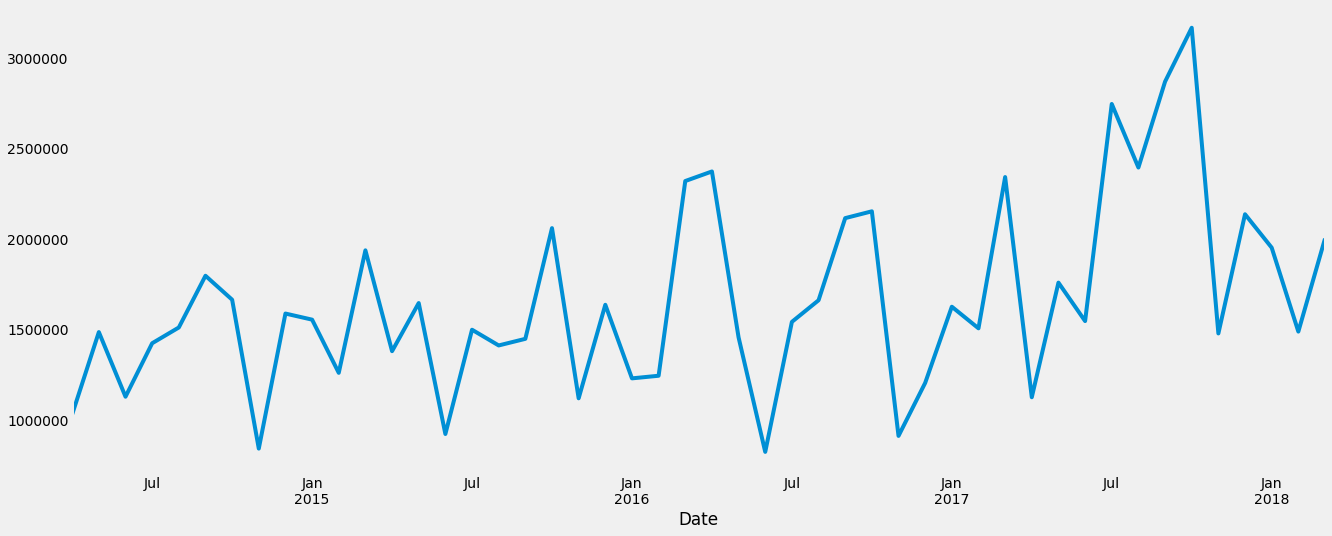

In [18]:
IC['sales'].plot()
plt.grid();

In [19]:
IC.sort_index(inplace= True)

In [20]:
IC.head()

,product,city,sales
Date,,,
2014-04-01,Induction cookers,Mumbai,1028092
2014-05-01,Induction cookers,Mumbai,1482890
2014-06-01,Induction cookers,Mumbai,1125290
2014-07-01,Induction cookers,Mumbai,1421152
2014-08-01,Induction cookers,Mumbai,1508375


In [21]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

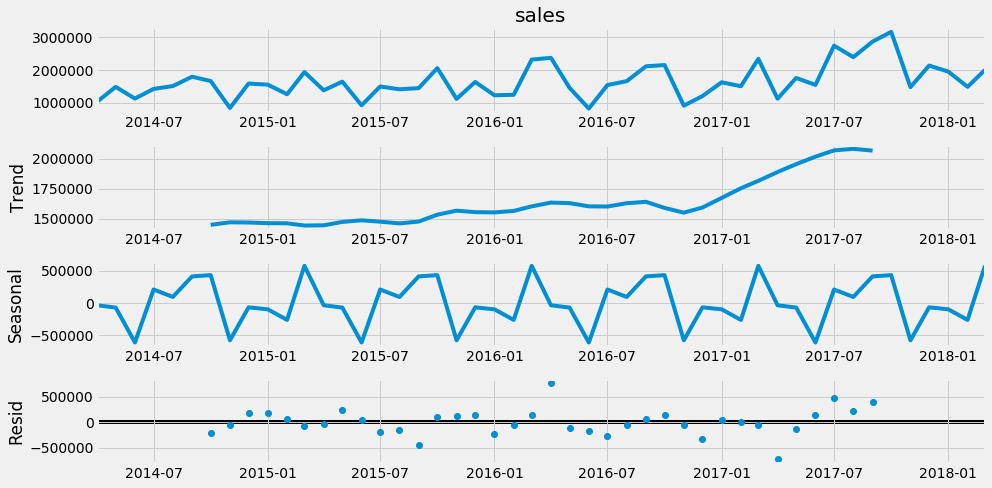

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(IC['sales'],model='additive')
decomposition.plot();

In [23]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.447109e+06
2014-11-01    1.468354e+06
2014-12-01    1.466448e+06
2015-01-01    1.460963e+06
2015-02-01    1.459936e+06
2015-03-01    1.441252e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -35020.053241
2014-05-01    -70707.650463
2014-06-01   -610821.469907
2014-07-01    208635.613426
2014-08-01     93557.099537
2014-09-01    411660.960648
2014-10-01    431005.627315
2014-11-01   -576939.733796
2014-12-01    -67188.428241
2015-01-01    -97818.011574
2015-02-01   -261634.956019
2015-03-01    575271.002315
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -216012.335648
2014-11-01    -53111.266204
2014-

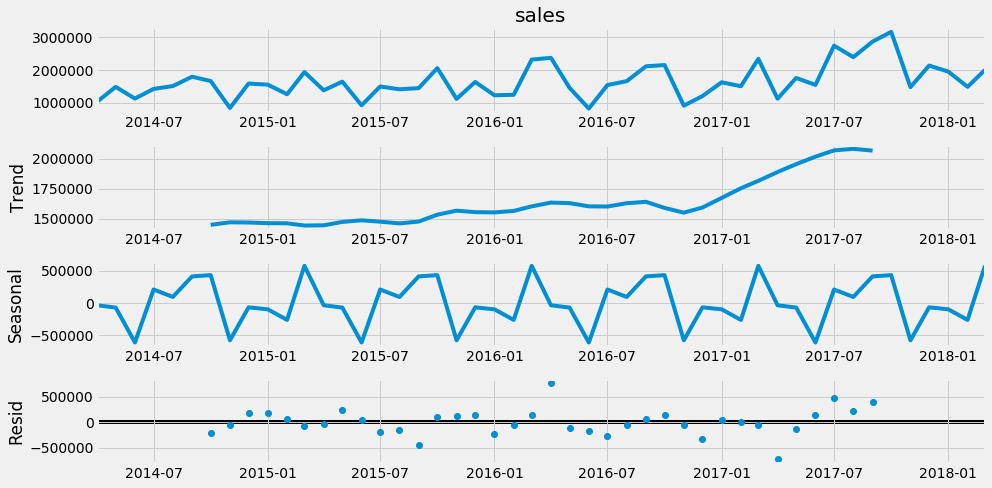

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(IC['sales'],model='Multiplicative')
decomposition.plot();

In [25]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.447109e+06
2014-11-01    1.468354e+06
2014-12-01    1.466448e+06
2015-01-01    1.460963e+06
2015-02-01    1.459936e+06
2015-03-01    1.441252e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -35020.053241
2014-05-01    -70707.650463
2014-06-01   -610821.469907
2014-07-01    208635.613426
2014-08-01     93557.099537
2014-09-01    411660.960648
2014-10-01    431005.627315
2014-11-01   -576939.733796
2014-12-01    -67188.428241
2015-01-01    -97818.011574
2015-02-01   -261634.956019
2015-03-01    575271.002315
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -216012.335648
2014-11-01    -53111.266204
2014-

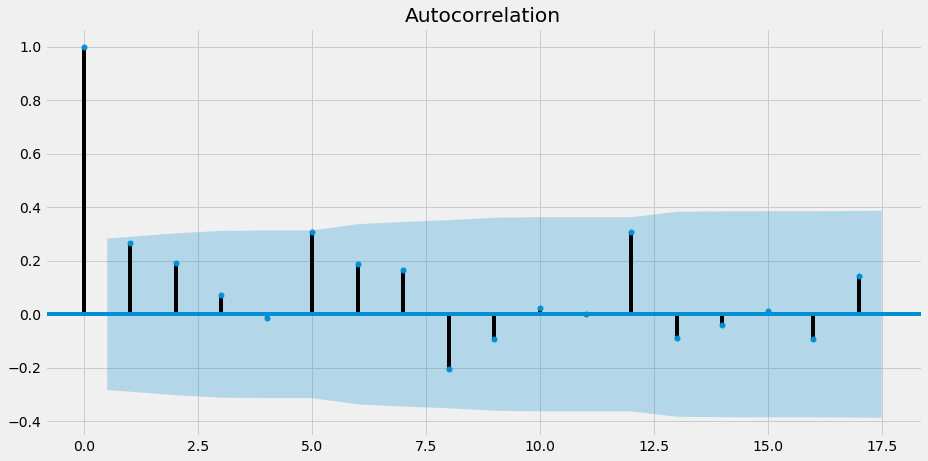

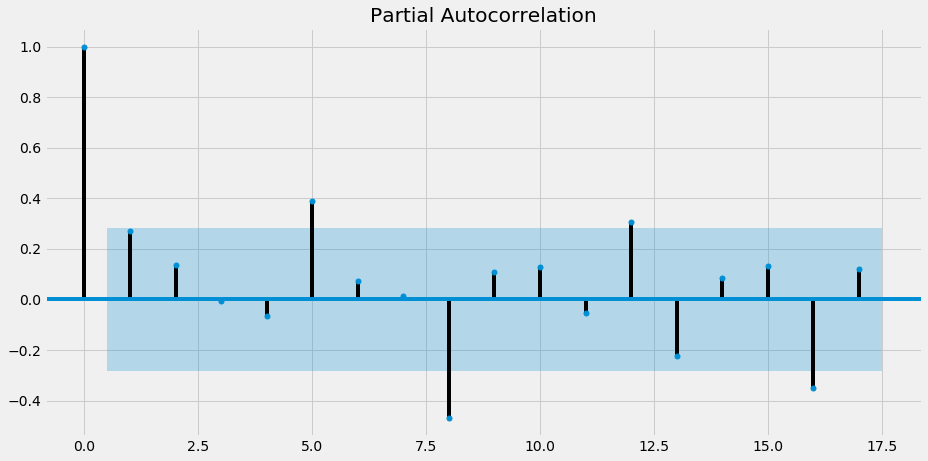

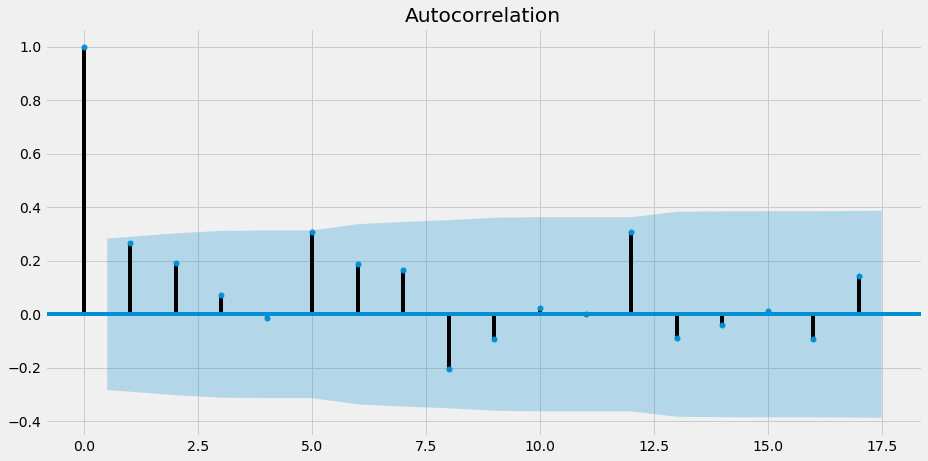

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(IC['sales'])
plot_acf(IC['sales'])

In [26]:
IC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [27]:
train    =   IC[0:int(len(IC)*0.7)] 
test     =  IC[int(len(IC)*0.7):]

In [33]:
train.shape

(33, 3)

In [34]:
test.shape

(15, 3)

In [35]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Induction cookers,Mumbai,1028092
2014-05-01,Induction cookers,Mumbai,1482890
2014-06-01,Induction cookers,Mumbai,1125290
2014-07-01,Induction cookers,Mumbai,1421152
2014-08-01,Induction cookers,Mumbai,1508375


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Induction cookers,Mumbai,1658986
2016-09-01,Induction cookers,Mumbai,2113501
2016-10-01,Induction cookers,Mumbai,2151152
2016-11-01,Induction cookers,Mumbai,908362
2016-12-01,Induction cookers,Mumbai,1201639


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Induction cookers,Mumbai,1623282
2017-02-01,Induction cookers,Mumbai,1503747
2017-03-01,Induction cookers,Mumbai,2340661
2017-04-01,Induction cookers,Mumbai,1122325
2017-05-01,Induction cookers,Mumbai,1756603


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Induction cookers,Mumbai,1475462
2017-12-01,Induction cookers,Mumbai,2134903
2018-01-01,Induction cookers,Mumbai,1950095
2018-02-01,Induction cookers,Mumbai,1485612
2018-03-01,Induction cookers,Mumbai,1999953


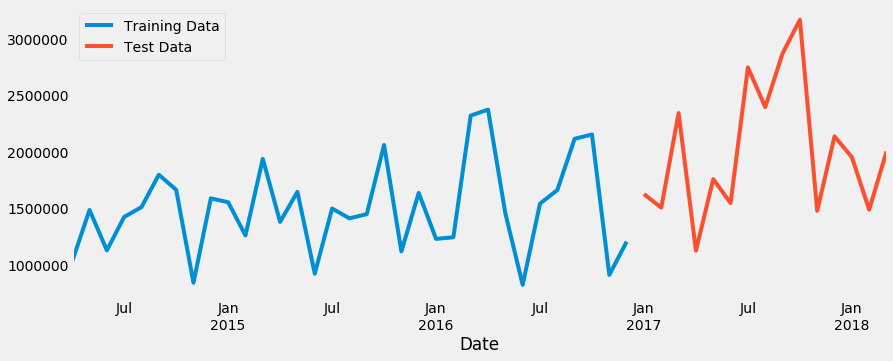

In [36]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [38]:
from sklearn import metrics

Simpleaverage

In [39]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [40]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Induction cookers,Mumbai,1623282,1.493772e+06
2017-02-01,Induction cookers,Mumbai,1503747,1.493772e+06
2017-03-01,Induction cookers,Mumbai,2340661,1.493772e+06
2017-04-01,Induction cookers,Mumbai,1122325,1.493772e+06
2017-05-01,Induction cookers,Mumbai,1756603,1.493772e+06


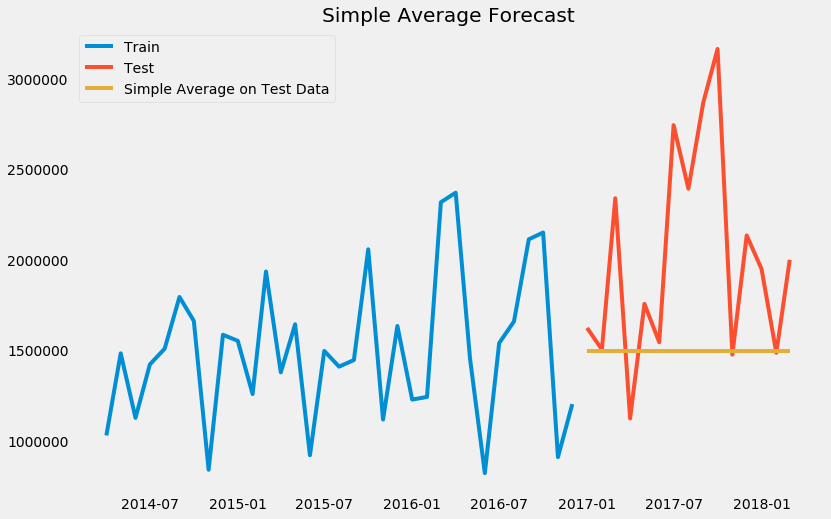

In [41]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [42]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 769646.605


In [43]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,769646.605464


In [44]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [45]:
SES_train = train.copy()
SES_test = test.copy()

In [46]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [47]:
model_SES_autofit = model_SES.fit(optimized=True)

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [48]:
model_SES_autofit.params

{'smoothing_level': 0.15465116279069768,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1028092.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [49]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Induction cookers,Mumbai,1623282,1.525908e+06
2017-02-01,Induction cookers,Mumbai,1503747,1.525908e+06
2017-03-01,Induction cookers,Mumbai,2340661,1.525908e+06
2017-04-01,Induction cookers,Mumbai,1122325,1.525908e+06
2017-05-01,Induction cookers,Mumbai,1756603,1.525908e+06


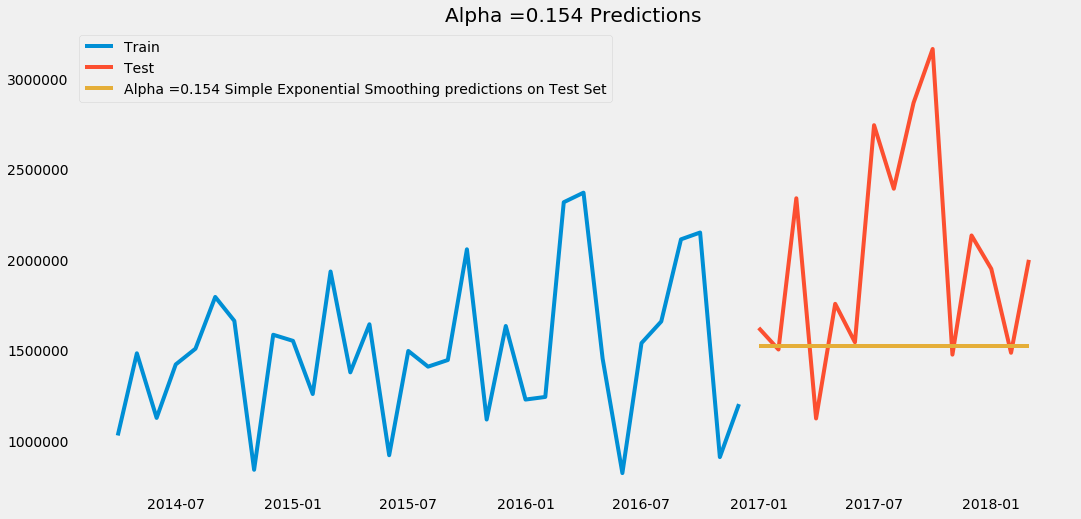

In [50]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.154 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.154 Predictions');

In [51]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.154 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.154 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 748583.818


In [52]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [53]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 23.462333528852472


In [54]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.265,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,769646.605464,NaN
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334


In [55]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [56]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [57]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,445679.921143,7.527758e+05
1,0.2,442987.484517,7.587137e+05
2,0.3,453593.809796,7.962351e+05
3,0.4,466432.517486,8.425430e+05
4,0.5,479448.517781,8.911435e+05
5,0.6,492206.868225,9.367540e+05
6,0.7,504998.057053,9.737786e+05
7,0.8,518536.667038,9.970349e+05
8,0.9,533735.305436,1.002720e+06


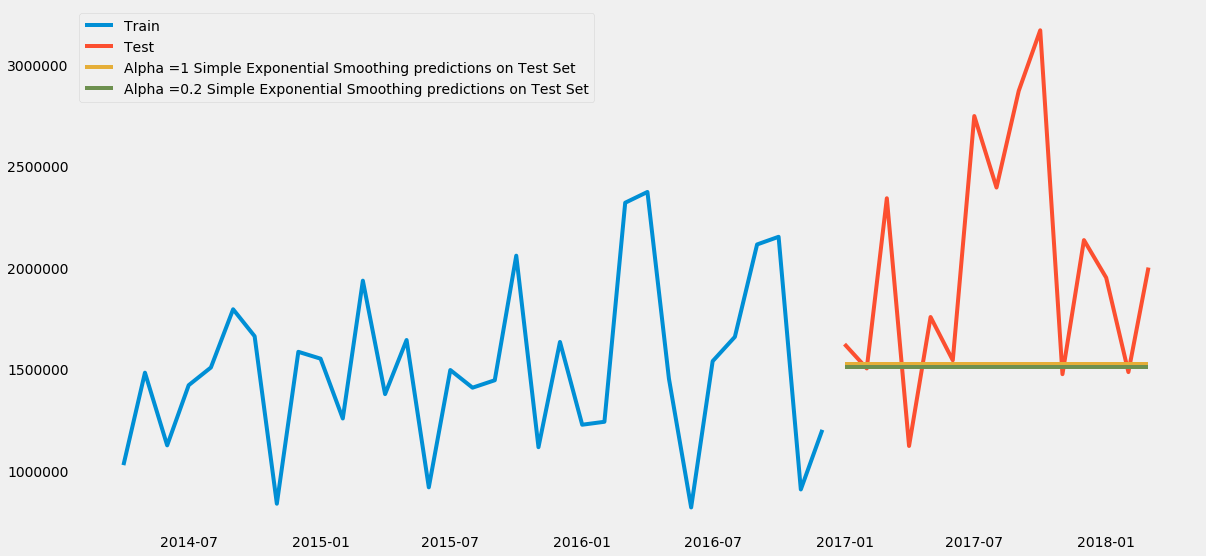

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [59]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1
                                                                ])
print('\nMAPE:',mape)


MAPE: 23.56105591963909


In [60]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,769646.605464,NaN
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",752775.798806,23.561056


Double

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
model_DES = Holt(DES_train['sales'])

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [63]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [64]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [65]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.757931e+06,9.094596e+05
1,0.1,0.2,1.253611e+06,1.483095e+06
2,0.1,0.3,1.064358e+06,6.886464e+05
3,0.1,0.4,9.475321e+05,6.446358e+05
4,0.1,0.5,8.704691e+05,6.093769e+05
...,...,...,...,...
95,1.0,0.6,7.392694e+05,1.762450e+06
96,1.0,0.7,7.757799e+05,1.315964e+06
97,1.0,0.8,8.155895e+05,7.449133e+05
98,1.0,0.9,8.596062e+05,8.904958e+05


In [66]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
4,0.1,0.5,8.704691e+05,609376.852049
3,0.1,0.4,9.475321e+05,644635.777270
5,0.1,0.6,8.147239e+05,655003.908755
2,0.1,0.3,1.064358e+06,688646.374484
97,1.0,0.8,8.155895e+05,744913.305222


In [67]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.5])
print('\nMAPE:',mape)


MAPE: 31.6625783632759


In [68]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,769646.605464,NaN
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",752775.798806,23.561056
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",609376.852049,31.662578


In [69]:
TES_train = train.copy()
TES_test = test.copy()

In [70]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
model_TES_autofit = model_TES.fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [72]:
model_TES_autofit.params

{'smoothing_level': 0.005,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 1451525.7111111104,
 'initial_trend': 1848.035858585994,
 'initial_seasons': array([0.97727402, 1.1439336 , 0.63368719, 1.0396796 , 0.98880531,
        1.0039502 , 1.17617967, 0.58463849, 1.10713608, 1.08764506,
        0.88195698, 1.3751138 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Induction cookers,Mumbai,1623282,1.652884e+06
2017-02-01,Induction cookers,Mumbai,1503747,1.341957e+06
2017-03-01,Induction cookers,Mumbai,2340661,2.094906e+06
2017-04-01,Induction cookers,Mumbai,1122325,1.490659e+06
2017-05-01,Induction cookers,Mumbai,1756603,1.746880e+06


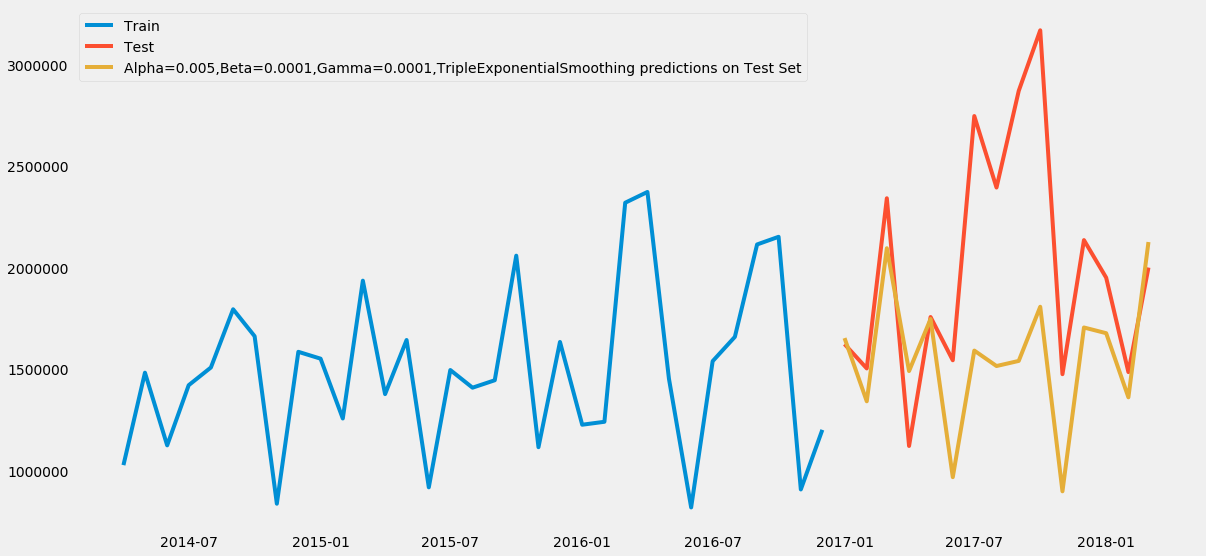

In [74]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [75]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.005,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.005,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 677788.136


In [76]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 23.296276974569334


In [77]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,769646.605464,NaN
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",752775.798806,23.561056
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",609376.852049,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",677788.136195,23.296277


In [78]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [79]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [80]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,2.827606e+05,5.900114e+05
1,0.1,0.1,0.2,2.841329e+05,5.884414e+05
2,0.1,0.1,0.3,2.859415e+05,5.927529e+05
3,0.1,0.1,0.4,2.880416e+05,6.022064e+05
4,0.1,0.1,0.5,2.903561e+05,6.159500e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,1.589658e+06,1.096266e+07
996,1.0,1.0,0.7,1.435352e+07,5.581490e+07
997,1.0,1.0,0.8,4.227873e+06,1.942017e+07
998,1.0,1.0,0.9,3.772623e+06,3.122750e+07


In [81]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
10,0.1,0.2,0.1,285284.811287,578871.770183
11,0.1,0.2,0.2,286776.462783,582188.749077
1,0.1,0.1,0.2,284132.855700,588441.398101
20,0.1,0.3,0.1,287923.681630,588922.495192
0,0.1,0.1,0.1,282760.556433,590011.356579


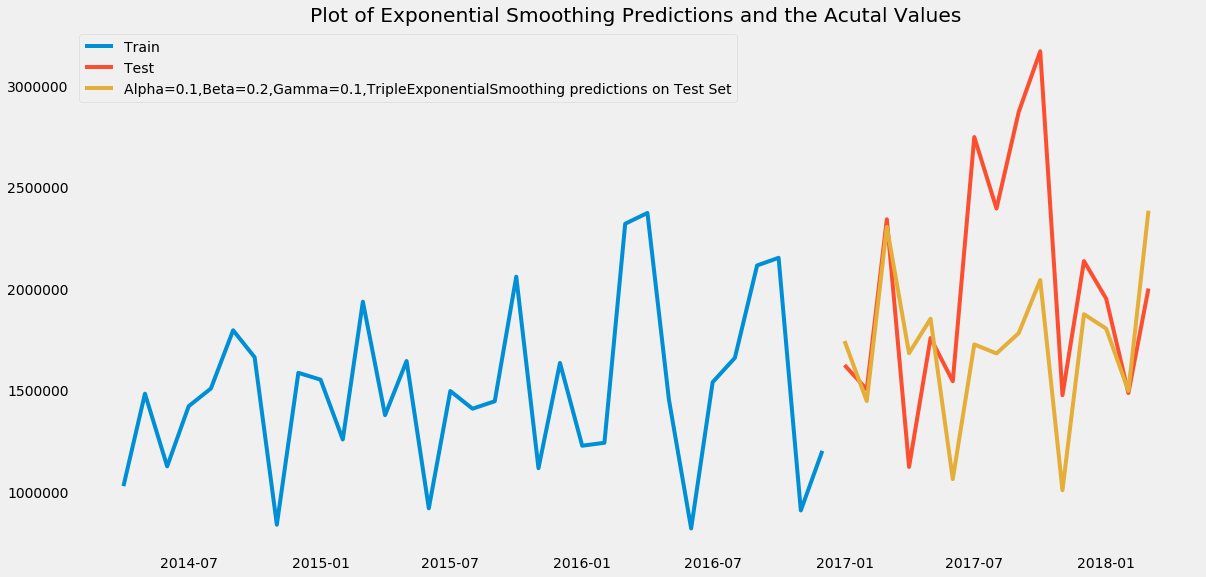

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.1000000000000000, 0.2000000000000000, 0.1], label='Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [84]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.1,0.2,0.1])
print('\nMAPE:',mape)


MAPE: 20.728163404599385


In [85]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,769646.605464,NaN
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",752775.798806,23.561056
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",609376.852049,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",677788.136195,23.296277
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",578871.770183,20.728163


In [86]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",578871.770183,20.728163
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",609376.852049,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",677788.136195,23.296277
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",752775.798806,23.561056
Simple Average,769646.605464,NaN


In [87]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

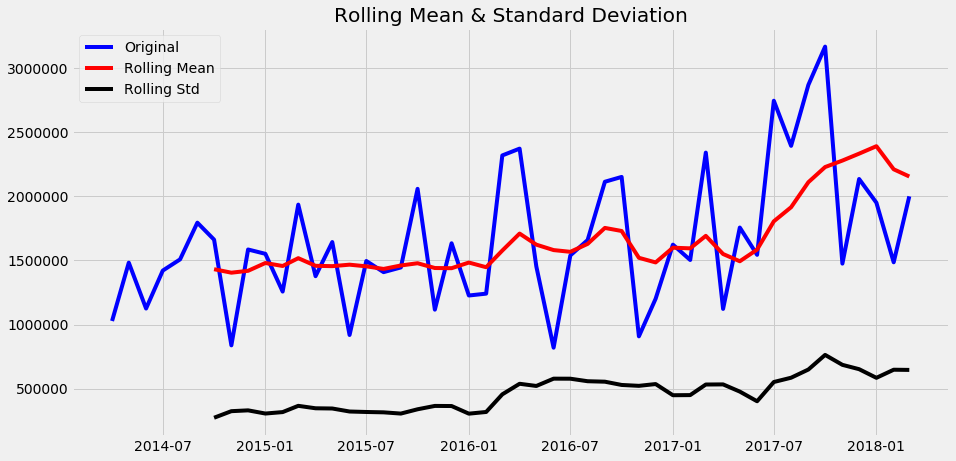

Results of Dickey-Fuller Test:
Test Statistic                 -2.448928
p-value                         0.128400
#Lags Used                      7.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64 



In [88]:
test_stationarity(IC['sales'])

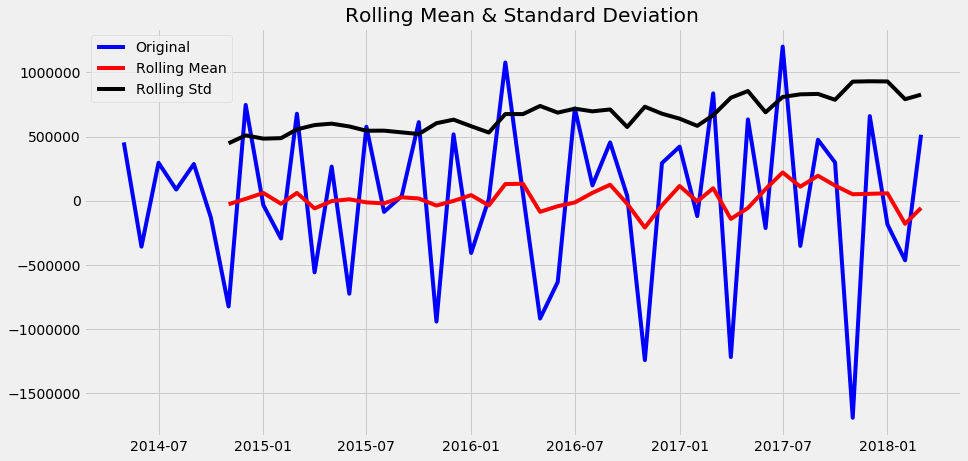

Results of Dickey-Fuller Test:
Test Statistic                 -3.896602
p-value                         0.002060
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64 



In [89]:
test_stationarity(IC['sales'].diff().dropna())

In [242]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [243]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [125]:
from statsmodels.tsa.stattools import adfuller

In [90]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [91]:

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [92]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:939.921562786904
ARIMA(0, 1, 1) - AIC:932.6717397849482
ARIMA(0, 1, 2) - AIC:934.613407814669
ARIMA(0, 1, 3) - AIC:930.9790071626678
ARIMA(1, 1, 0) - AIC:939.0885546806692
ARIMA(1, 1, 1) - AIC:933.6732601444875
ARIMA(1, 1, 2) - AIC:930.5897272471749
ARIMA(1, 1, 3) - AIC:932.4911562151603
ARIMA(2, 1, 0) - AIC:938.3328418142886
ARIMA(2, 1, 1) - AIC:934.2645790514648
ARIMA(2, 1, 2) - AIC:932.9001845901455
ARIMA(2, 1, 3) - AIC:933.7291349800938
ARIMA(3, 1, 0) - AIC:938.9490257556561
ARIMA(3, 1, 1) - AIC:935.5990114131369
ARIMA(3, 1, 2) - AIC:934.8565314295753
ARIMA(3, 1, 3) - AIC:934.3158339823106


In [93]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
6,"(1, 1, 2)",930.589727
3,"(0, 1, 3)",930.979007
7,"(1, 1, 3)",932.491156
1,"(0, 1, 1)",932.671740
10,"(2, 1, 2)",932.900185


In [94]:
auto_ARIMA = ARIMA(train['sales'], order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -461.295
Date:                Sat, 21 Aug 2021   AIC                            930.590
Time:                        16:17:19   BIC                            936.453
Sample:                    04-01-2014   HQIC                           932.533
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5902      0.134     -4.403      0.000      -0.853      -0.327
ma.L1          0.0947      0.345      0.274      0.784      -0.582       0.772
ma.L2         -0.9045      0.307     -2.944      0.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


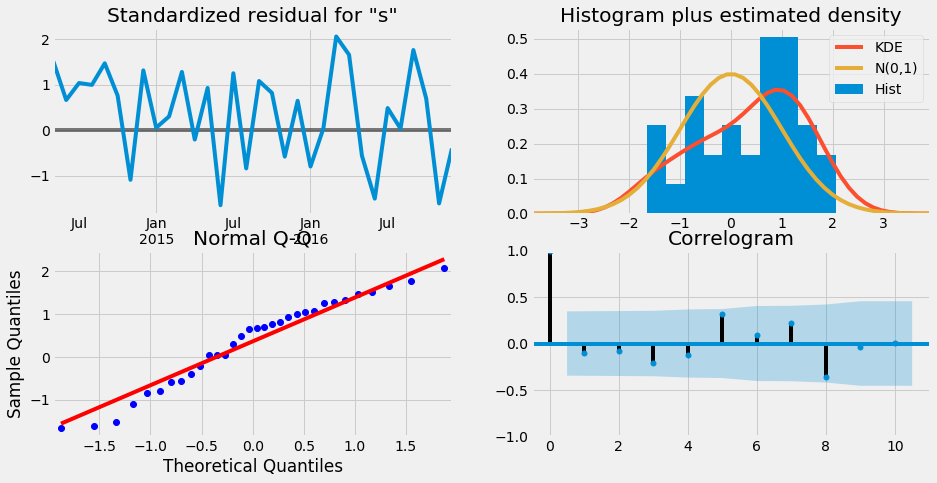

In [95]:
results_auto_ARIMA.plot_diagnostics();

In [96]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [97]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [98]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 747921.2965978391 
MAPE: 23.129844700310198


In [99]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(1,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,769646.605464,NaN
"Alpha=0.265,SimpleExponentialSmoothing",748583.818176,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",752775.798806,23.561056
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",609376.852049,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",677788.136195,23.296277
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",578871.770183,20.728163
"ARIMA(1,1,2)",20.728163,23.129845


In [100]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [101]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [102]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:553.7963100571429
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:201.53859178952328
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:236.87760895848479
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:202.68378609900236


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)



SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:520.9526023228154


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:174.75340371083894
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:234.43513541333138


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:175.826285460936


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(1, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(2, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 1)x(3, 1, 3, 12)12 - AIC:16.0
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:493.5216286232919


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:151.8541272615996


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(0, 1, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:237.6996527268978


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:149.52904849539976


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(1, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(2, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 2)x(3, 1, 3, 12)12 - AIC:18.0
SARIMA(0, 1, 3)x(0, 1, 0, 12)12 - AIC:463.35863013357323


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(0, 1, 1, 12)12 - AIC:124.1028439647889


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(0, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(1, 1, 0, 12)12 - AIC:239.05830673618772


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:126.12431555250879


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(0, 1, 3)x(3, 1, 3, 12)12 - AIC:20.0
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:551.8497154233239
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:203.64053076733853


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:8.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:203.02153529772968


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:204.89857710005833


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(1, 1, 3, 12)12 - AIC:12.0
SARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:8.0

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(2, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 0)x(3, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:521.8558218158386


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:176.51953245953518


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(0, 1, 3, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:202.5683557298365


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:177.6123438534273
SARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(1, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(2, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 1)x(3, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:489.9010225467143


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:149.3851400066505
SARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(0, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:204.33154032633186


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:150.87636688711018


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 2)x(3, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 0, 12)12 - AIC:464.7153673654743


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 1, 12)12 - AIC:122.7759347714247


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(0, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 0, 12)12 - AIC:206.8999779752362


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 1, 12)12 - AIC:124.77576588096521


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(1, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(2, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(1, 1, 3)x(3, 1, 3, 12)12 - AIC:22.0
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:523.4547066073027
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:204.7118542731643


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base

SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(0, 1, 3, 12)12 - AIC:12.0
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:175.86494517606886


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:177.76941143386188


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(1, 1, 3, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:10.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(2, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 0)x(3, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:515.7751531653164


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:176.49421125836562
SARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:176.91589486452048


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:178.87348562095337


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 1)x(3, 1, 3, 12)12 - AIC:20.0
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:495.1758719607201


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:149.0982520650365


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(0, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:176.96593102377147
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:151.02692948316385


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(1, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(2, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 2)x(3, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(0, 1, 0, 12)12 - AIC:461.63819375168146


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:120.55677638162437
SARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:175.15629069649592


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:122.60380235483206
SARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
SARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:493.0762675541326
SARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:205.48980558042408

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:149.29292204278784


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:151.1458953758634


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(1, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(1, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 0, 12)12 - AIC:12.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 1, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(2, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 0)x(3, 1, 3, 12)12 - AIC:20.0
SARIMA(3, 1, 1)x(0, 1, 0, 12)12 - AIC:494.33505407018174


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(0, 1, 1, 12)12 - AIC:179.21861725853745


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(0, 1, 2, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(0, 1, 3, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(1, 1, 0, 12)12 - AIC:151.29449252608643


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(1, 1, 1, 12)12 - AIC:153.2113603329231


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(1, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(1, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 0, 12)12 - AIC:14.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 1, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(2, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 1)x(3, 1, 3, 12)12 - AIC:22.0
SARIMA(3, 1, 2)x(0, 1, 0, 12)12 - AIC:497.4909980767871


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(0, 1, 1, 12)12 - AIC:149.15634332284097


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(0, 1, 2, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(0, 1, 3, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 1, 2)x(1, 1, 0, 12)12 - AIC:149.15758514178296
SARIMA(3, 1, 2)x(1, 1, 1, 12)12 - AIC:151.160061813957


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(1, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(1, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 0, 12)12 - AIC:16.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 1, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(2, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 0, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 2, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 2)x(3, 1, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(0, 1, 0, 12)12 - AIC:481.735515764025


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 1, 3)x(0, 1, 1, 12)12 - AIC:121.96828480234488
SARIMA(3, 1, 3)x(0, 1, 2, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(0, 1, 3, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.p

SARIMA(3, 1, 3)x(1, 1, 0, 12)12 - AIC:149.07813975596343


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(1, 1, 1, 12)12 - AIC:122.9566369661197
SARIMA(3, 1, 3)x(1, 1, 2, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(1, 1, 3, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 0, 12)12 - AIC:18.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 1, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 2, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(2, 1, 3, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 0, 12)12 - AIC:20.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 1, 12)12 - AIC:22.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 2, 12)12 - AIC:24.0


c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


SARIMA(3, 1, 3)x(3, 1, 3, 12)12 - AIC:26.0


In [103]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
2,"(0, 1, 0)","(0, 1, 2, 12)",6.0
8,"(0, 1, 0)","(2, 1, 0, 12)",6.0
9,"(0, 1, 0)","(2, 1, 1, 12)",8.0
66,"(1, 1, 0)","(0, 1, 2, 12)",8.0
24,"(0, 1, 1)","(2, 1, 0, 12)",8.0


In [104]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,1,0),
                                seasonal_order=(0,1,2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Sat, 21 Aug 2021   AIC                              6.000
Time:                                         16:19:27   BIC                                nan
Sample:                                     04-01-2014   HQIC                               nan
                                          - 12-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0        

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [105]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [106]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,794453.0,416799.865792,-22459.725714,1.611366e+06
2017-02-01,808915.0,589444.022999,-346374.055980,1.964204e+06
2017-03-01,1886369.0,721918.544140,471434.653714,3.301303e+06
2017-04-01,1939346.0,833599.731585,305520.548572,3.573171e+06
2017-05-01,1020997.0,931992.832924,-805675.386381,2.847669e+06


In [107]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1225905970431.9333 
MAPE: 54.45941734264618


In [108]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,7.696466e+05,NaN
"Alpha=0.265,SimpleExponentialSmoothing",7.485838e+05,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",7.527758e+05,23.561056
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",6.093769e+05,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",6.777881e+05,23.296277
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",5.788718e+05,20.728163
"ARIMA(1,1,2)",2.072816e+01,23.129845
"SARIMA(0,1,0)(0,1,2)12",1.225906e+12,54.459417


In [109]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,1,2)",2.072816e+01,23.129845
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",5.788718e+05,20.728163
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",6.093769e+05,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",6.777881e+05,23.296277
"Alpha=0.265,SimpleExponentialSmoothing",7.485838e+05,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",7.527758e+05,23.561056
Simple Average,7.696466e+05,NaN
"SARIMA(0,1,0)(0,1,2)12",1.225906e+12,54.459417


In [110]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [111]:
IC.head()

,product,city,sales
Date,,,
2014-04-01,Induction cookers,Mumbai,1028092
2014-05-01,Induction cookers,Mumbai,1482890
2014-06-01,Induction cookers,Mumbai,1125290
2014-07-01,Induction cookers,Mumbai,1421152
2014-08-01,Induction cookers,Mumbai,1508375


In [112]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(IC1['date'])
df_prophet['y'] =IC1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,1475462
2017-12-01,2017-12-01,2134903
2018-01-01,2018-01-01,1950095
2018-02-01,2018-02-01,1485612
2018-03-01,2018-03-01,1999953


In [113]:
df_prophet.shape

(48, 2)

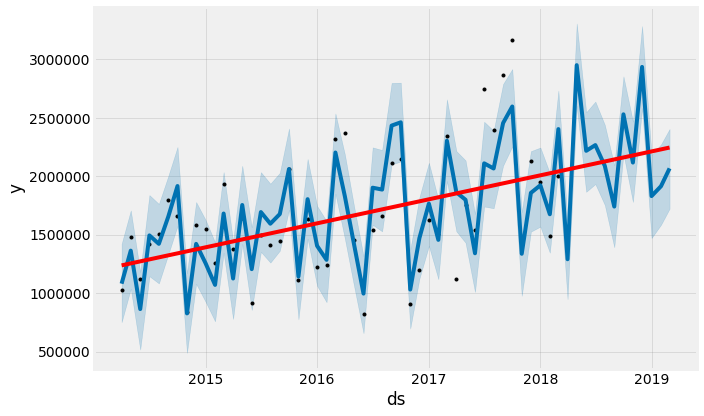

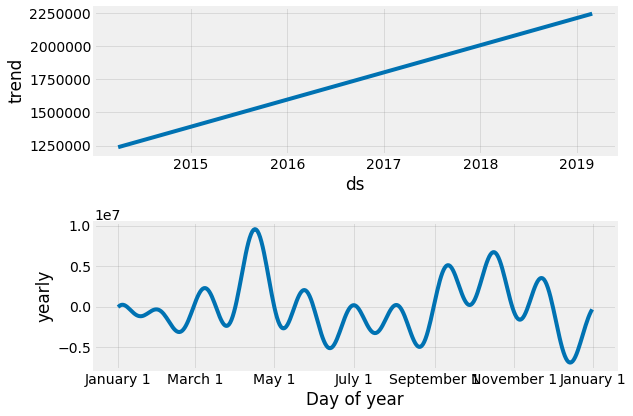

In [114]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [115]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,1.238000e+06,7.518646e+05,1.421529e+06,1.238000e+06,1.238000e+06,-156603.351923,-156603.351923,-156603.351923,-156603.351923,-156603.351923,-156603.351923,0.0,0.0,0.0,1.081397e+06
1,2014-05-01,1.254853e+06,1.038605e+06,1.708200e+06,1.254853e+06,1.254853e+06,109368.814685,109368.814685,109368.814685,109368.814685,109368.814685,109368.814685,0.0,0.0,0.0,1.364222e+06
2,2014-06-01,1.272268e+06,5.176746e+05,1.181738e+06,1.272268e+06,1.272268e+06,-408082.834586,-408082.834586,-408082.834586,-408082.834586,-408082.834586,-408082.834586,0.0,0.0,0.0,8.641848e+05
3,2014-07-01,1.289120e+06,1.145380e+06,1.839392e+06,1.289120e+06,1.289120e+06,205197.257939,205197.257939,205197.257939,205197.257939,205197.257939,205197.257939,0.0,0.0,0.0,1.494318e+06
4,2014-08-01,1.306535e+06,1.083658e+06,1.763500e+06,1.306535e+06,1.306535e+06,115638.433205,115638.433205,115638.433205,115638.433205,115638.433205,115638.433205,0.0,0.0,0.0,1.422174e+06
5,2014-09-01,1.323950e+06,1.333462e+06,2.003548e+06,1.323950e+06,1.323950e+06,332203.709583,332203.709583,332203.709583,332203.709583,332203.709583,332203.709583,0.0,0.0,0.0,1.656153e+06
6,2014-10-01,1.340803e+06,1.576107e+06,2.250784e+06,1.340803e+06,1.340803e+06,575996.711315,575996.711315,575996.711315,575996.711315,575996.711315,575996.711315,0.0,0.0,0.0,1.916799e+06
7,2014-11-01,1.358217e+06,4.897012e+05,1.170384e+06,1.358217e+06,1.358217e+06,-530985.974158,-530985.974158,-530985.974158,-530985.974158,-530985.974158,-530985.974158,0.0,0.0,0.0,8.272313e+05
8,2014-12-01,1.375070e+06,1.080071e+06,1.779702e+06,1.375070e+06,1.375070e+06,46901.581002,46901.581002,46901.581002,46901.581002,46901.581002,46901.581002,0.0,0.0,0.0,1.421972e+06
9,2015-01-01,1.392485e+06,9.260813e+05,1.626745e+06,1.392485e+06,1.392485e+06,-136558.377850,-136558.377850,-136558.377850,-136558.377850,-136558.377850,-136558.377850,0.0,0.0,0.0,1.255926e+06


In [116]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

352580841330.03735


In [117]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,7.696466e+05,NaN
"Alpha=0.265,SimpleExponentialSmoothing",7.485838e+05,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",7.527758e+05,23.561056
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",6.093769e+05,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",6.777881e+05,23.296277
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",5.788718e+05,20.728163
"ARIMA(1,1,2)",2.072816e+01,23.129845
"SARIMA(0,1,0)(0,1,2)12",1.225906e+12,54.459417
Prophet,3.525808e+11,NaN


In [118]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,1,2)",2.072816e+01,23.129845
"Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing",5.788718e+05,20.728163
"Alpha=0.1,Beta=0.5,DoubleExponentialSmoothing",6.093769e+05,31.662578
"Alpha=0.005,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",6.777881e+05,23.296277
"Alpha=0.265,SimpleExponentialSmoothing",7.485838e+05,23.462334
"Alpha=0.1,SimpleExponentialSmoothing",7.527758e+05,23.561056
Simple Average,7.696466e+05,NaN
Prophet,3.525808e+11,NaN
"SARIMA(0,1,0)(0,1,2)12",1.225906e+12,54.459417


In [119]:
import fbprophet

In [120]:
m = fbprophet.Prophet()

In [121]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
future = m.make_future_dataframe(periods=365)

In [123]:
forecast = m.predict(future)

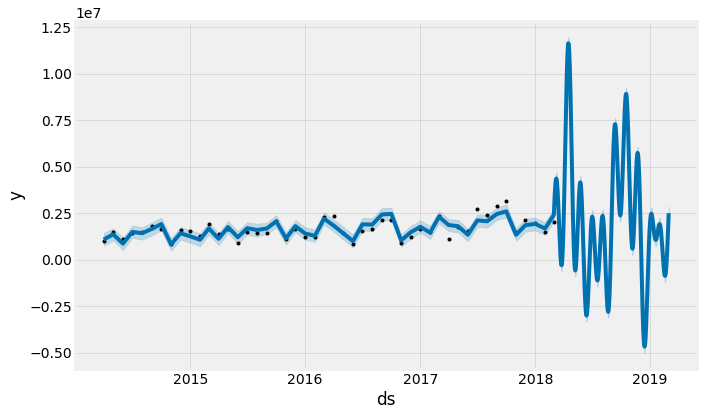

In [124]:
m.plot(forecast);

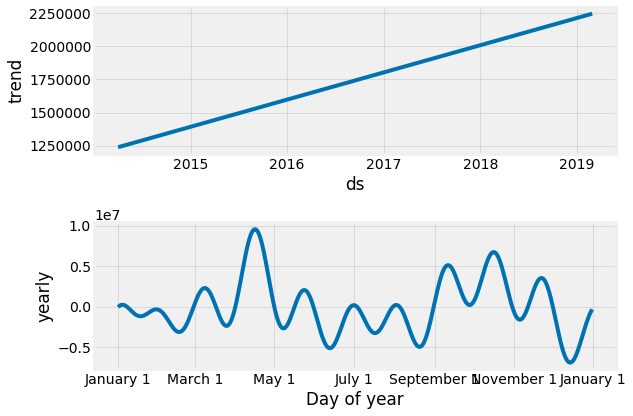

In [125]:
m.plot_components(forecast);

In [126]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,1028092
2014-05-01,2014-05-01,1482890
2014-06-01,2014-06-01,1125290
2014-07-01,2014-07-01,1421152
2014-08-01,2014-08-01,1508375


In [127]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [128]:
predict=m.predict(future)

In [129]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,1.238000e+06,7.558507e+05,1.430622e+06,1.238000e+06,1.238000e+06,-1.566034e+05,-1.566034e+05,-1.566034e+05,-1.566034e+05,-1.566034e+05,-1.566034e+05,0.0,0.0,0.0,1.081397e+06
1,2014-05-01,1.254853e+06,1.030661e+06,1.727160e+06,1.254853e+06,1.254853e+06,1.093688e+05,1.093688e+05,1.093688e+05,1.093688e+05,1.093688e+05,1.093688e+05,0.0,0.0,0.0,1.364222e+06
2,2014-06-01,1.272268e+06,5.075746e+05,1.185055e+06,1.272268e+06,1.272268e+06,-4.080828e+05,-4.080828e+05,-4.080828e+05,-4.080828e+05,-4.080828e+05,-4.080828e+05,0.0,0.0,0.0,8.641848e+05
3,2014-07-01,1.289120e+06,1.109851e+06,1.828060e+06,1.289120e+06,1.289120e+06,2.051973e+05,2.051973e+05,2.051973e+05,2.051973e+05,2.051973e+05,2.051973e+05,0.0,0.0,0.0,1.494318e+06
4,2014-08-01,1.306535e+06,1.088870e+06,1.778434e+06,1.306535e+06,1.306535e+06,1.156384e+05,1.156384e+05,1.156384e+05,1.156384e+05,1.156384e+05,1.156384e+05,0.0,0.0,0.0,1.422174e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,2.244385e+06,4.782059e+05,1.125789e+06,2.244376e+06,2.244395e+06,-1.454750e+06,-1.454750e+06,-1.454750e+06,-1.454750e+06,-1.454750e+06,-1.454750e+06,0.0,0.0,0.0,7.896349e+05
409,2019-02-26,2.244947e+06,8.621420e+05,1.559464e+06,2.244938e+06,2.244957e+06,-1.044936e+06,-1.044936e+06,-1.044936e+06,-1.044936e+06,-1.044936e+06,-1.044936e+06,0.0,0.0,0.0,1.200011e+06
410,2019-02-27,2.245509e+06,1.285923e+06,1.970236e+06,2.245500e+06,2.245519e+06,-6.157817e+05,-6.157817e+05,-6.157817e+05,-6.157817e+05,-6.157817e+05,-6.157817e+05,0.0,0.0,0.0,1.629727e+06
411,2019-02-28,2.246071e+06,1.703141e+06,2.420148e+06,2.246062e+06,2.246081e+06,-1.783067e+05,-1.783067e+05,-1.783067e+05,-1.783067e+05,-1.783067e+05,-1.783067e+05,0.0,0.0,0.0,2.067765e+06


In [130]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,1.081397e+06,7.558507e+05,1.430622e+06
1,2014-05-01,1.364222e+06,1.030661e+06,1.727160e+06
2,2014-06-01,8.641848e+05,5.075746e+05,1.185055e+06
3,2014-07-01,1.494318e+06,1.109851e+06,1.828060e+06
4,2014-08-01,1.422174e+06,1.088870e+06,1.778434e+06


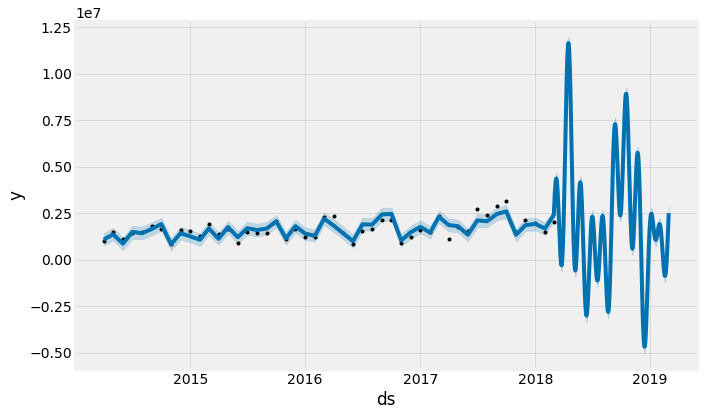

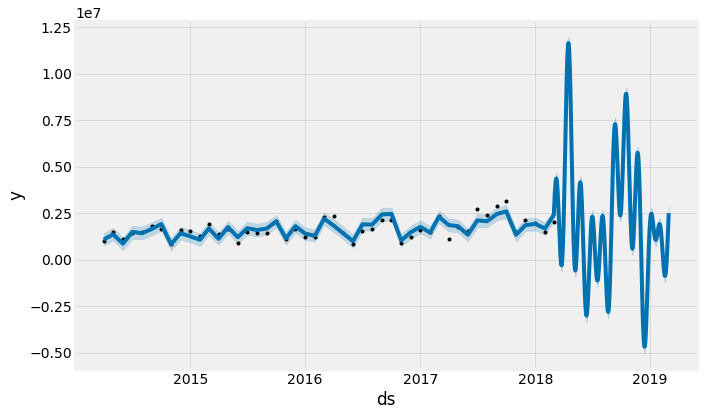

In [131]:
m.plot(predict)

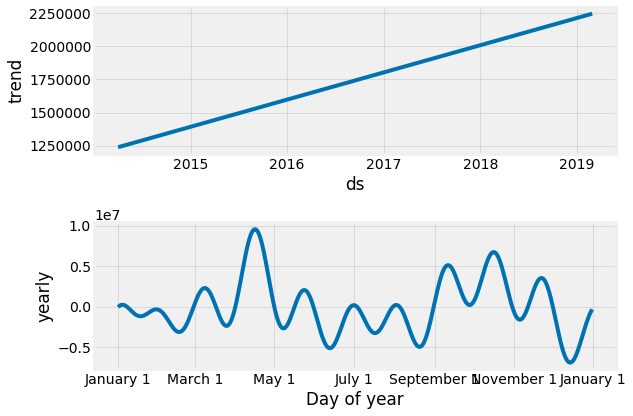

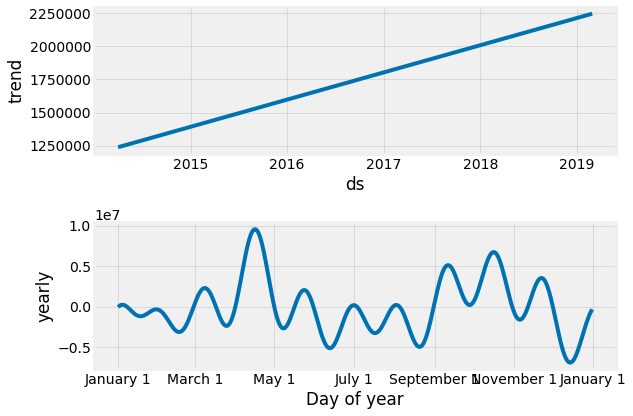

In [132]:
m.plot_components(predict)

In [133]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [134]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.672480e+06,1.507251e+06,1.849539e+06,2151152,2016-09-02
1,2016-11-01,9.014704e+05,7.455341e+05,1.067532e+06,908362,2016-09-02
2,2016-12-01,1.773701e+06,1.613623e+06,1.938958e+06,1201639,2016-09-02
3,2017-01-01,2.084076e+06,1.925709e+06,2.233406e+06,1623282,2016-09-02
4,2017-02-01,6.595267e+05,4.921835e+05,8.249110e+05,1503747,2016-09-02


In [135]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,4.728929e+11,687672.108248,662614.601289,0.488404,0.488404,0.0
1,60 days,3.583532e+11,598626.054470,426724.313287,0.380938,0.380938,0.5
2,61 days,9.955570e+09,99777.600334,73915.018217,0.043910,0.043910,1.0
3,90 days,1.735593e+11,416604.510884,356500.248299,0.278151,0.278151,0.5
4,92 days,2.772368e+11,526532.836050,524368.320310,0.392417,0.392417,0.0


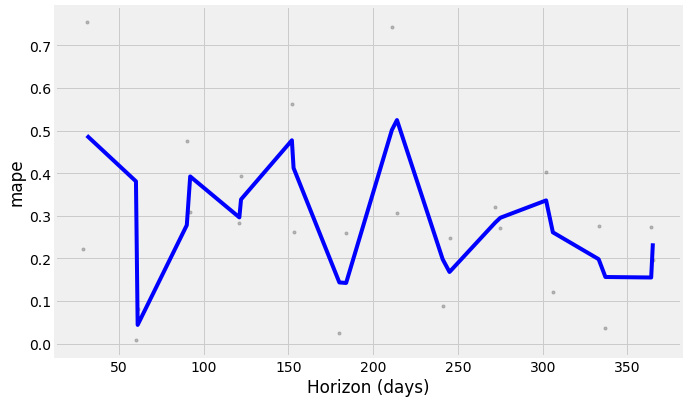

In [136]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [137]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(IC['sales'], (0,1,3)).fit()

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


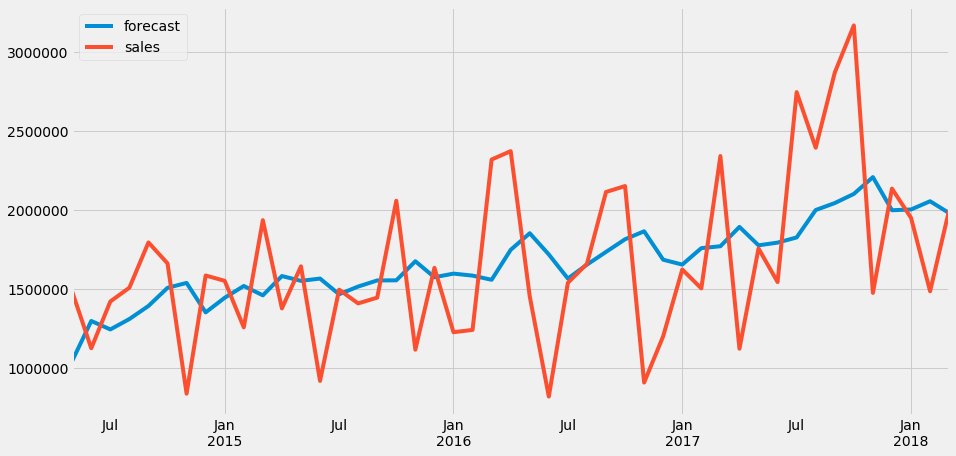

In [138]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [139]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(IC.sales, order=(0,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   47
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -681.901
Method:                       css-mle   S.D. of innovations         465991.142
Date:                Sat, 21 Aug 2021   AIC                           1373.802
Time:                        16:21:07   BIC                           1383.053
Sample:                    05-01-2014   HQIC                          1377.283
                         - 03-01-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.713e+04   5751.729      2.978      0.003    5852.645    2.84e+04
ma.L1.D.sales    -0.8711      0.161     -5.396      0.000      -1.187      -0.555
ma.L2.D.sales    -0.0583      0.229     

In [140]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = IC.sales[:33]
test = IC.sales[33:]

c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\sandi\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


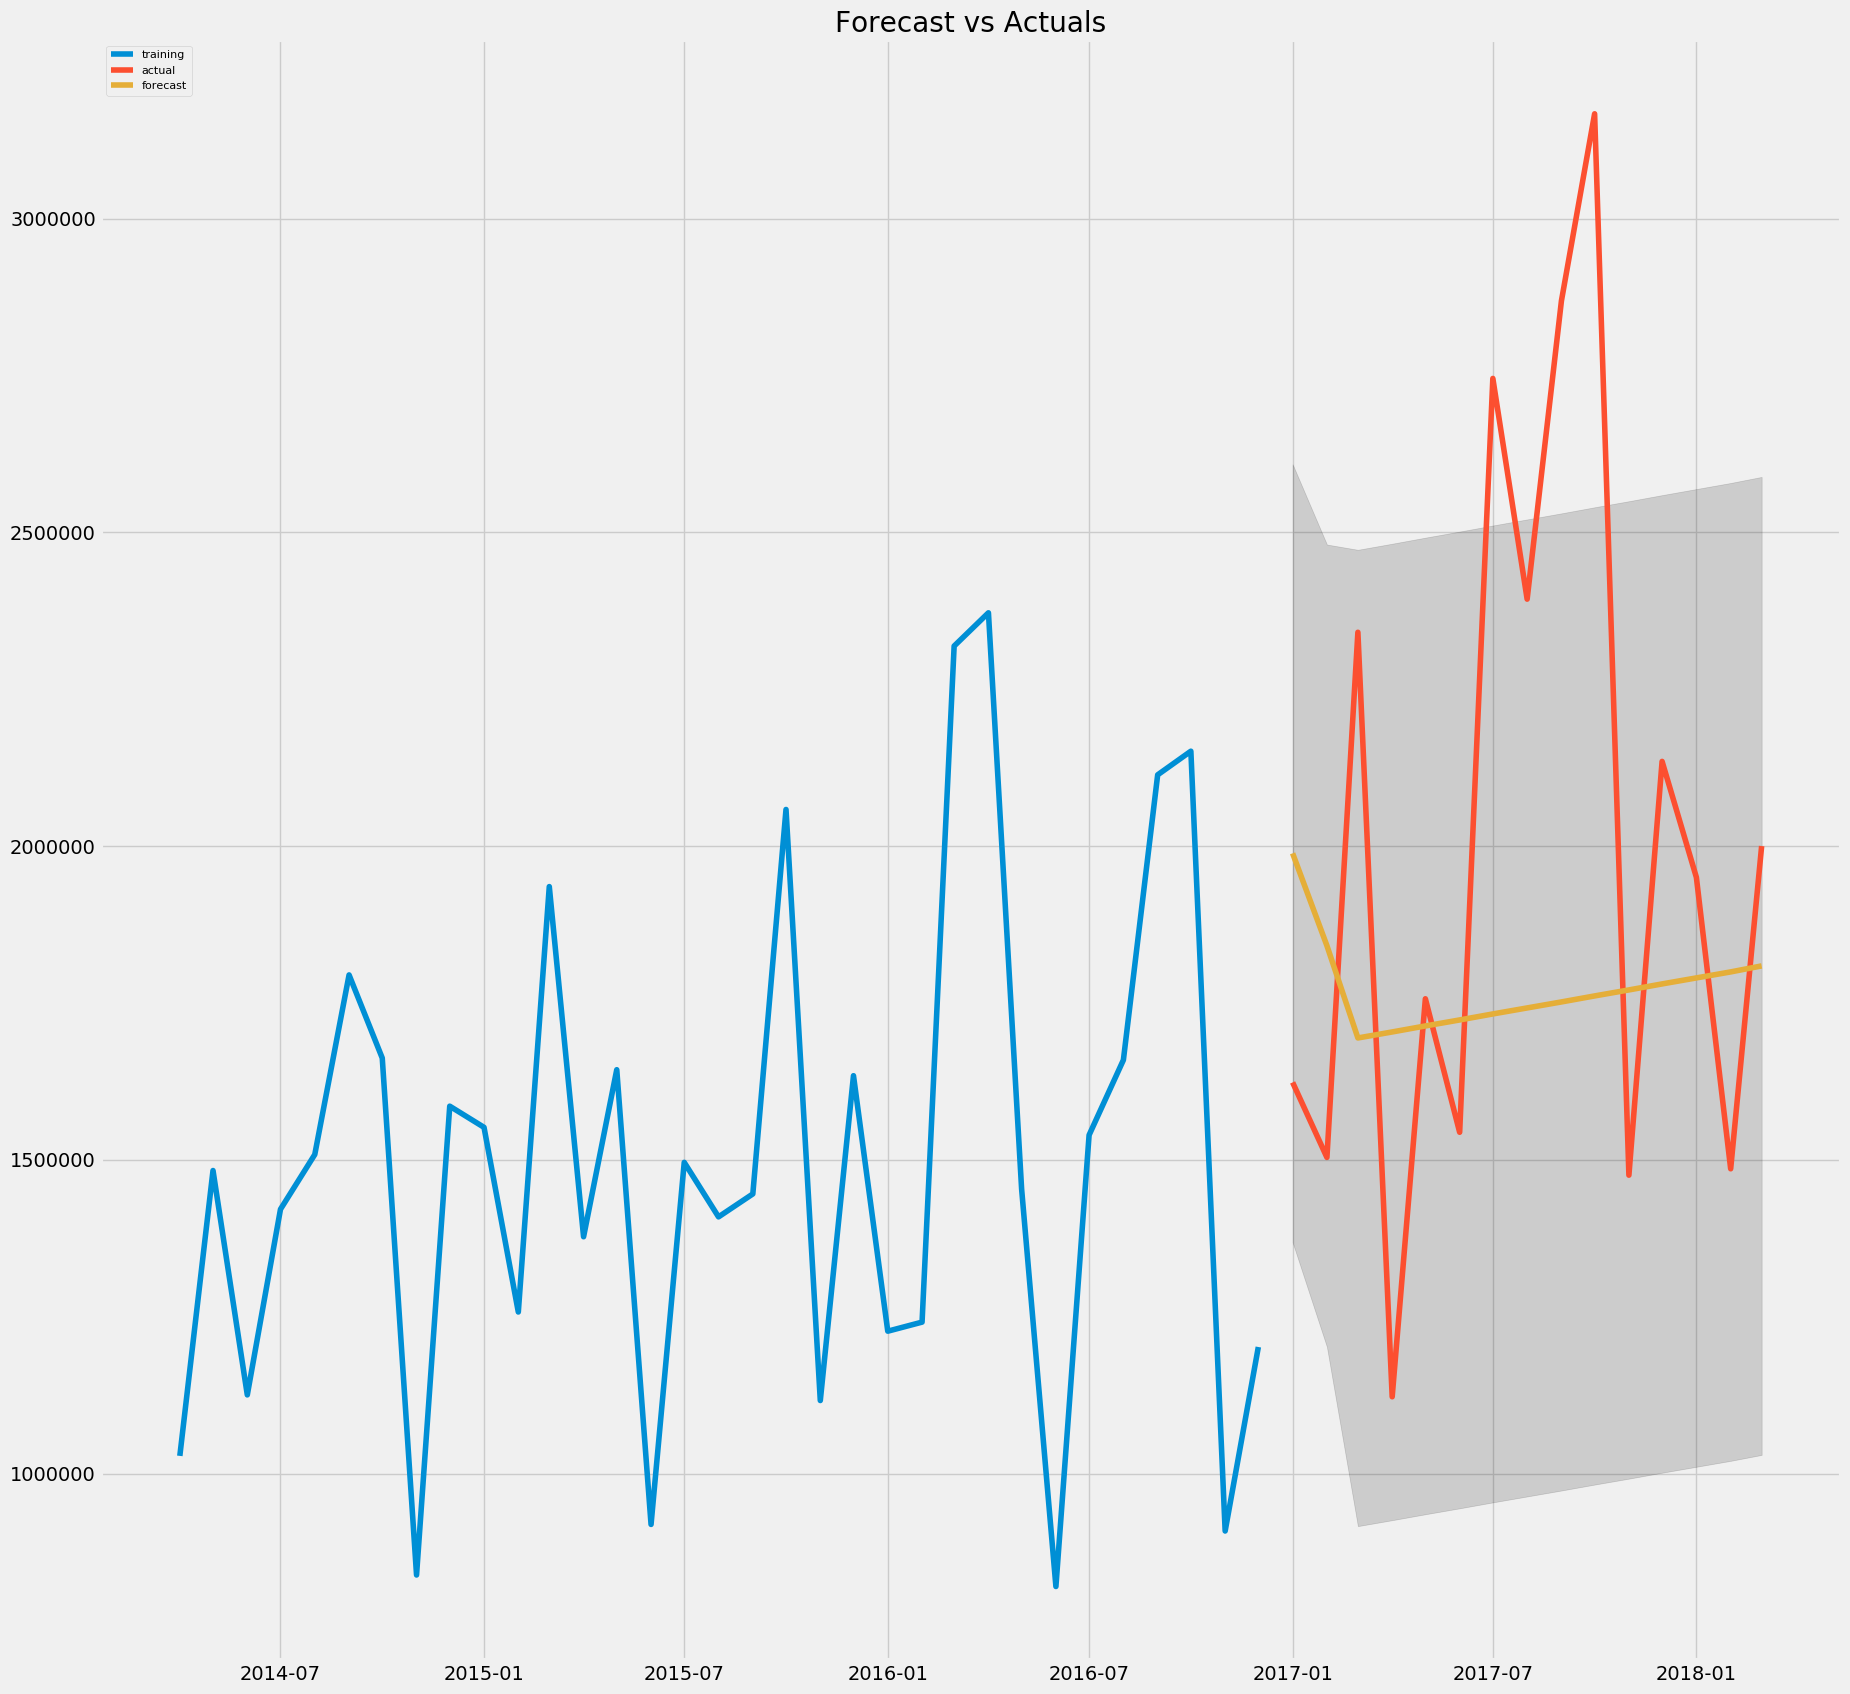

In [142]:
model = ARIMA(train, order=(0,1,3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()